
# Project: Investigate a Dataset (gun-data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Introduction
the dataset used in this notebook is the FBI Gun datasets

Questions to ansower
1. How Many guns in California?
2. Distribution Total Guns per State?

In [13]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html




<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [14]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_gun= pd.read_csv('gun-data.csv')
df_gun.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506




### Data Cleaning (Add Unique Column for Year )

the main data cleaning is Unique Column addition for Year to be able extract data per year 

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Add unique Column for Year
df_gun['year']=pd.DatetimeIndex(df_gun['month']).year
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017


In [16]:
###Add Unique Column to represent year only

<a id='eda'></a>
## Exploratory Data Analysis


   ### Research Question 1 (How Many guns in California!)

In [17]:
#If there is no data given, returns none
def parse_date(date):
    if date== '':
        return None
    else:
        return dt.gun(date,'%Y-%m-%dT%H:M:%S%fZ')

#To find total guns for spasific year
res_df=df_gun[(df_gun['year']==2017) & (df_gun['state']=='California')]

res_df['totals'].sum()


1167528

Text(0.5,0,'Year')

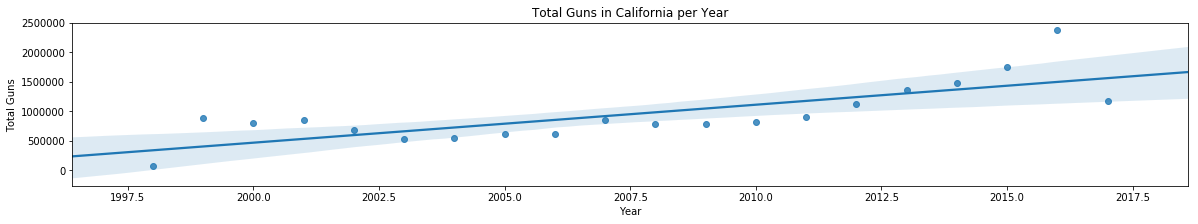

In [24]:
#Select California Table Only
df_California=df_gun[df_gun['state']=='California']
#Aggrregate California Table by Year
df_California_AggreByYear=df_California.groupby(df_California['year'])
total_Guns_per_Year=df_California_AggreByYear.sum()

#Reset Index to convert Year to columen
final_Table1=total_Guns_per_Year.reset_index()

#Plot
ax=sns.regplot(x="year", y="totals", data=final_Table1)
plt.title('Total Guns in California per Year')
plt.ylabel('Total Guns')
plt.xlabel('Year')

###Observation
###1. higest total guns was on 2016.
###2. Lowest total guns was on 1998.

### Research Question 2  (Distribution Total Guns per State !)

Text(0.5,0,'State')

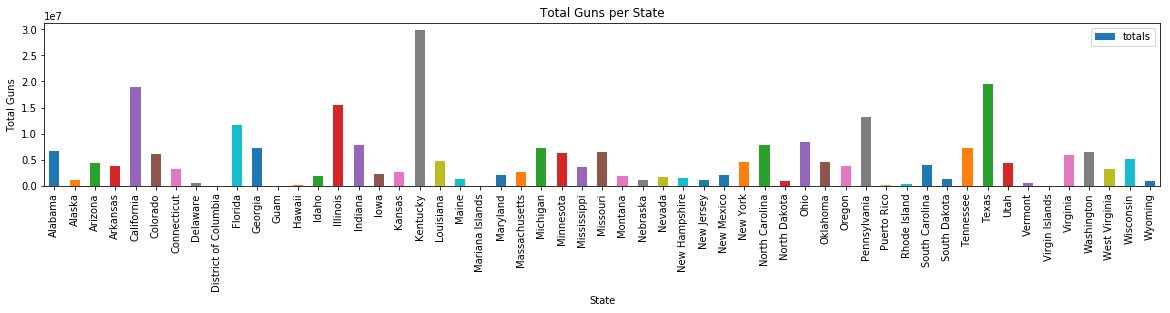

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_gun_AggreByState=df_gun.groupby(df_gun['state'])
total_Guns_per_State=df_gun_AggreByState.sum()
final_Table2=total_Guns_per_State.reset_index()


final_Table2.plot.bar(x="state", y="totals")
plt.rcParams['figure.figsize']=  20,3
plt.title('Total Guns per State')
plt.ylabel('Total Guns')
plt.xlabel('State')



Observation
1. higest total guns was in Kentucky.
2. Lowest total guns was in Mariana Islands.

<a id='conclusions'></a>
## Conclusions
> Resulte 
addition year coulmn support me to be abal deal with data.
> Limitation
> Some of names for type guns need more explination to be involved. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])


0